In [1]:
# importing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# reading the dataset into a pandas dataframe
df = pd.read_csv('car.data')

In [3]:
# viewing the dataframe
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
# transforming categorical data to corresponding numerical values for it be used by the learning algorithm
label = LabelEncoder()
df['buying'] = label.fit_transform(df['buying'])
df['maint'] = label.fit_transform(df['maint'])
df['doors'] = label.fit_transform(df['doors'])
df['persons'] = label.fit_transform(df['persons'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])

In [5]:
# viewing the transformed dataframe
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,good
1724,1,1,3,2,1,0,vgood
1725,1,1,3,2,0,1,unacc
1726,1,1,3,2,0,2,good


In [6]:
df1 = df.copy();

In [7]:
# unique classes that have to be predicted
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [8]:
# checking if categorical values are transformed to numerical values
df.applymap(np.isreal)

,buying,maint,doors,persons,lug_boot,safety,class
0,True,True,True,True,True,True,False
1,True,True,True,True,True,True,False
2,True,True,True,True,True,True,False
3,True,True,True,True,True,True,False
4,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...
1723,True,True,True,True,True,True,False
1724,True,True,True,True,True,True,False
1725,True,True,True,True,True,True,False
1726,True,True,True,True,True,True,False


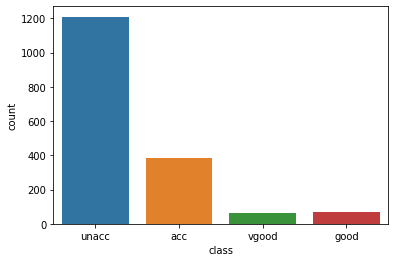

In [9]:
# visualizing the count of each class using a countplot
image = sns.countplot(x='class',data=df)
#image.figure.savefig("image.png")
# This indicates imbalanced data

In [10]:
# X is the list of input features, y is the list of output classes that have to be predicted
X = df1.drop(['class','doors'],axis = 1).values
y = df1['class'].values

In [11]:
# splitting dataset into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [12]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
#knn.score(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [13]:
# checking accuracy of knn model on training data
yhat_train = knn.predict(X_train)
print('Accuracy : ',accuracy_score(yhat_train,y_train))

Accuracy :  0.9371381306865177


In [14]:
# checking accuracy of knn model on test data
#yhat_test = knn.predict(X_test)
#print('Accuracy : ',accuracy_score(yhat_test,y_test))
print(np.mean(cross_val_score(knn, X_test, y_test, cv=3)))

0.8439306358381503


In [15]:
# random forest classifier with n_estimators = 100
rfc = RandomForestClassifier(n_estimators = 150, random_state=42)
rfc.fit(X_train,y_train)
#rfc.score(X_test1,y_test1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [16]:
# checking accuracy of random forest classifier on training data
yhat_train_rfc = rfc.predict(X_train)
print('Accuracy : ',accuracy_score(yhat_train_rfc,y_train))

Accuracy :  0.967741935483871


In [17]:
# checking accuracy of random forest classifier on test data
#yhat_test_rfc = rfc.predict(X_test)
#print('Accuracy : ',accuracy_score(yhat_test_rfc,y_test))
print(np.mean(cross_val_score(rfc, X_test, y_test, cv=3)))

0.9152215799614644


In [18]:
svm = SVC(kernel="poly",degree=5)
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
#print(svm.score(X_test, y_test))
print(np.mean(cross_val_score(svm, X_test, y_test, cv=3)))

0.9305210918114144
0.8593448940269749
